Com os nossos dados ja limpos, juntos e processados, podemos treinar os modelos e comparar desempenhos agora

In [1]:
import pandas as pd
import numpy as np
import os
import joblib # Para salvar os modelos

# Bibliotecas de modelagem
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, LogisticRegression # Modelos iniciais
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier # Modelos mais complexos
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report # Métricas

# Configurações do Pandas
pd.set_option('display.max_columns', None)

# Caminho para o dataset processado
processed_data_path = '../data/processed/nba_player_gamelogs_processed.csv'

# Carrega os dados
try:
    df_processed = pd.read_csv(processed_data_path, parse_dates=['GAME_DATE'])
    print("Dataset processado carregado com sucesso!")
    display(df_processed.head())
    df_processed.info()
except FileNotFoundError:
    print(f"ERRO: Arquivo não encontrado em {processed_data_path}. Verifique o caminho.")

Dataset processado carregado com sucesso!


,Player_ID,Game_ID,GAME_DATE,MIN,PTS,AST,REB,FG3M,FGM,FGA,FTM,FTA,OREB,DREB,TOV,PF,PLUS_MINUS,OPPONENT,HOME,MIN_MA_5,PTS_MA_5,AST_MA_5,REB_MA_5,FG3M_MA_5,FGM_MA_5,FGA_MA_5,FTM_MA_5,FTA_MA_5,OREB_MA_5,DREB_MA_5,TOV_MA_5,PF_MA_5,MIN_MA_10,PTS_MA_10,AST_MA_10,REB_MA_10,FG3M_MA_10,FGM_MA_10,FGA_MA_10,FTM_MA_10,FTA_MA_10,OREB_MA_10,DREB_MA_10,TOV_MA_10,PF_MA_10,Season,DAYS_REST,IS_B2B,WIN_LAST_GAME
0,2544,22200002,2022-10-18,35,31,8,15,3,12,26,4,4,5,10,5,2,-10,GSW,0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-23,7.0,0,0.0
1,2544,22200016,2022-10-20,37,20,6,10,2,7,17,4,6,2,8,2,3,-1,LAC,1,35.000000,31.000000,8.000000,15.0,3.000000,12.000000,26.000000,4.000000,4.000000,5.000000,10.000000,5.000000,2.000000,35.000000,31.000000,8.000000,15.0,3.000000,12.000000,26.000000,4.000000,4.000000,5.000000,10.000000,5.000000,2.000000,2022-23,1.0,0,0.0
2,2544,22200037,2022-10-23,38,31,8,8,2,12,22,5,7,1,7,4,3,2,POR,1,36.000000,25.500000,7.000000,12.5,2.500000,9.500000,21.500000,4.000000,5.000000,3.500000,9.000000,3.500000,2.500000,36.000000,25.500000,7.000000,12.5,2.500000,9.500000,21.500000,4.000000,5.000000,3.500000,9.000000,3.500000,2.500000,2022-23,2.0,0,0.0
3,2544,22200064,2022-10-26,35,19,9,7,2,8,21,1,2,2,5,8,1,-7,DEN,0,36.666667,27.333333,7.333333,11.0,2.333333,10.333333,21.666667,4.333333,5.666667,2.666667,8.333333,3.666667,2.666667,36.666667,27.333333,7.333333,11.0,2.333333,10.333333,21.666667,4.333333,5.666667,2.666667,8.333333,3.666667,2.666667,2022-23,2.0,0,0.0
4,2544,22200076,2022-10-28,37,28,5,7,1,10,24,7,8,3,4,3,2,-13,MIN,0,36.250000,25.250000,7.750000,10.0,2.250000,9.750000,21.500000,3.500000,4.750000,2.500000,7.500000,4.750000,2.250000,36.250000,25.250000,7.750000,10.0,2.250000,9.750000,21.500000,3.500000,4.750000,2.500000,7.500000,4.750000,2.250000,2022-23,1.0,0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58871 entries, 0 to 58870
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_ID      58871 non-null  int64         
 1   Game_ID        58871 non-null  int64         
 2   GAME_DATE      58871 non-null  datetime64[ns]
 3   MIN            58871 non-null  int64         
 4   PTS            58871 non-null  int64         
 5   AST            58871 non-null  int64         
 6   REB            58871 non-null  int64         
 7   FG3M           58871 non-null  int64         
 8   FGM            58871 non-null  int64         
 9   FGA            58871 non-null  int64         
 10  FTM            58871 non-null  int64         
 11  FTA            58871 non-null  int64         
 12  OREB           58871 non-null  int64         
 13  DREB           58871 non-null  int64         
 14  TOV            58871 non-null  int64         
 15  PF             5887

Selecionando as variaveis alvo e atributos

In [2]:
# Lista das variáveis alvo
target_cols_regressao = ['PTS', 'AST', 'REB', 'FG3M']

# Lista inicial das features 
#quase tudo, exceto IDs, data e as alvo
feature_cols = [
    'MIN', 'HOME', 'DAYS_REST', 'IS_B2B', 'WIN_LAST_GAME',
    'OPPONENT', # Coluna categórica que precisará de tratamento
    # Adiciona todas as colunas de médias móveis
] + [col for col in df_processed.columns if '_MA_' in col]

# Adiciona as colunas de estatísticas defensivas do oponente
# Exemplo: feature_cols.extend(['OPP_PTS_PER_G', 'OPP_FG_PCT', ...]) 
opp_cols = [col for col in df_processed.columns if col.startswith('OPP_')]
feature_cols.extend(opp_cols)

# Remove duplicatas, caso alguma coluna tenha sido adicionada duas vezes
feature_cols = list(dict.fromkeys(feature_cols)) 

print("Variáveis Alvo (Regressão):", target_cols_regressao)
print("\nFeatures Selecionadas:", feature_cols)

# Define X (features) e y (alvos para regressão)
X = df_processed[feature_cols]
y_reg = df_processed[target_cols_regressao]

#Primeiras linhas das features e alvos
print("\nFeatures (X):")
display(X.head())
print("\nAlvos de Regressão (y_reg):")
display(y_reg.head())

Variáveis Alvo (Regressão): ['PTS', 'AST', 'REB', 'FG3M']

Features Selecionadas: ['MIN', 'HOME', 'DAYS_REST', 'IS_B2B', 'WIN_LAST_GAME', 'OPPONENT', 'MIN_MA_5', 'PTS_MA_5', 'AST_MA_5', 'REB_MA_5', 'FG3M_MA_5', 'FGM_MA_5', 'FGA_MA_5', 'FTM_MA_5', 'FTA_MA_5', 'OREB_MA_5', 'DREB_MA_5', 'TOV_MA_5', 'PF_MA_5', 'MIN_MA_10', 'PTS_MA_10', 'AST_MA_10', 'REB_MA_10', 'FG3M_MA_10', 'FGM_MA_10', 'FGA_MA_10', 'FTM_MA_10', 'FTA_MA_10', 'OREB_MA_10', 'DREB_MA_10', 'TOV_MA_10', 'PF_MA_10']

Features (X):


,MIN,HOME,DAYS_REST,IS_B2B,WIN_LAST_GAME,OPPONENT,MIN_MA_5,PTS_MA_5,AST_MA_5,REB_MA_5,FG3M_MA_5,FGM_MA_5,FGA_MA_5,FTM_MA_5,FTA_MA_5,OREB_MA_5,DREB_MA_5,TOV_MA_5,PF_MA_5,MIN_MA_10,PTS_MA_10,AST_MA_10,REB_MA_10,FG3M_MA_10,FGM_MA_10,FGA_MA_10,FTM_MA_10,FTA_MA_10,OREB_MA_10,DREB_MA_10,TOV_MA_10,PF_MA_10
0,35,0,7.0,0,0.0,GSW,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,37,1,1.0,0,0.0,LAC,35.000000,31.000000,8.000000,15.0,3.000000,12.000000,26.000000,4.000000,4.000000,5.000000,10.000000,5.000000,2.000000,35.000000,31.000000,8.000000,15.0,3.000000,12.000000,26.000000,4.000000,4.000000,5.000000,10.000000,5.000000,2.000000
2,38,1,2.0,0,0.0,POR,36.000000,25.500000,7.000000,12.5,2.500000,9.500000,21.500000,4.000000,5.000000,3.500000,9.000000,3.500000,2.500000,36.000000,25.500000,7.000000,12.5,2.500000,9.500000,21.500000,4.000000,5.000000,3.500000,9.000000,3.500000,2.500000
3,35,0,2.0,0,0.0,DEN,36.666667,27.333333,7.333333,11.0,2.333333,10.333333,21.666667,4.333333,5.666667,2.666667,8.333333,3.666667,2.666667,36.666667,27.333333,7.333333,11.0,2.333333,10.333333,21.666667,4.333333,5.666667,2.666667,8.333333,3.666667,2.666667
4,37,0,1.0,0,0.0,MIN,36.250000,25.250000,7.750000,10.0,2.250000,9.750000,21.500000,3.500000,4.750000,2.500000,7.500000,4.750000,2.250000,36.250000,25.250000,7.750000,10.0,2.250000,9.750000,21.500000,3.500000,4.750000,2.500000,7.500000,4.750000,2.250000



Alvos de Regressão (y_reg):


,PTS,AST,REB,FG3M
0,31,8,15,3
1,20,6,10,2
2,31,8,8,2
3,19,9,7,2
4,28,5,7,1


Convertendo agora os dados da coluna opponent com o one Hot Encoding

In [3]:
categorical_features = ['OPPONENT']
numerical_features = [col for col in feature_cols if col != 'OPPONENT']

# Cria o transformador OneHotEncoder
# handle_unknown='ignore' diz para ignorar times que possam aparecer no teste mas não no treino
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False facilita visualização

# Cria um pré-processador que aplica o OneHotEncoder apenas na coluna 'OPPONENT'
# e deixa as outras colunas numéricas intactas ('passthrough')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough' # Mantém as outras colunas (numéricas)
)

print("Pré-processador criado para tratar a coluna OPPONENT.")

Pré-processador criado para tratar a coluna OPPONENT.


## Divisão em treino e teste

In [4]:
# Dividindo os dados (X e y_reg definidos no Passo 1)
# 80% para treino e 20% para teste padraozin
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg,
    test_size=0.2,
    random_state=42 # Para reprodutibilidade
    # Não usamos stratify aqui, pois temos múltiplas saídas de regressão
)

print("Dados divididos em treino e teste:")
print("Formato X_train:", X_train.shape)
print("Formato X_test:", X_test.shape)
print("Formato y_train_reg:", y_train_reg.shape)
print("Formato y_test_reg:", y_test_reg.shape)

Dados divididos em treino e teste:
Formato X_train: (47096, 32)
Formato X_test: (11775, 32)
Formato y_train_reg: (47096, 4)
Formato y_test_reg: (11775, 4)


Agora sim, aplicação do one hot

In [5]:
# Aplica o pré-processador aos dados de TREINO (.fit_transform())
X_train_processed = preprocessor.fit_transform(X_train)

# Aplica o MESMO pré-processador aos dados de TESTE (.transform())
X_test_processed = preprocessor.transform(X_test)

print("Dados pré-processados (com One-Hot Encoding):")
print("Formato X_train_processed:", X_train_processed.shape)
print("Formato X_test_processed:", X_test_processed.shape)

# Consequentemente vai ter um aumento de colunas

Dados pré-processados (com One-Hot Encoding):
Formato X_train_processed: (47096, 61)
Formato X_test_processed: (11775, 61)


## Treinando com o modelo de regressão - Ridge (baseline)

In [6]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Adiciona R2 Score
import numpy as np # Para calcular a raiz quadrada do MSE

# Cria uma instância do modelo Ridge
# alpha é um parâmetro de regularização (ajuda a evitar overfitting)
modelo_ridge = Ridge(alpha=1.0) 

print("Iniciando o treinamento do modelo Ridge...")
# Treina o modelo com os dados de treino processados
modelo_ridge.fit(X_train_processed, y_train_reg)
print("Modelo Ridge treinado com sucesso!")

# Faz previsões nos dados de teste
y_pred_reg = modelo_ridge.predict(X_test_processed)

print("\nPrevisões realizadas no conjunto de teste.")

Iniciando o treinamento do modelo Ridge...
Modelo Ridge treinado com sucesso!

Previsões realizadas no conjunto de teste.


## Avaliação do modelo de regressão (baseline)

In [7]:
# Nomes das nossas variáveis alvo para referência
target_names = y_train_reg.columns # ['PTS', 'AST', 'REB', 'FG3M']

print("Avaliando o desempenho do modelo Ridge:")

# Calcula as métricas para cada variável alvo
for i, target_name in enumerate(target_names):
    # Pega os valores reais da coluna i no y_test_reg
    y_true_col = y_test_reg.iloc[:, i]
    # Pega as previsões da coluna i no y_pred_reg
    y_pred_col = y_pred_reg[:, i]
    
    # Calcula as métricas
    mae = mean_absolute_error(y_true_col, y_pred_col)
    mse = mean_squared_error(y_true_col, y_pred_col)
    rmse = np.sqrt(mse) # Raiz quadrada do MSE
    r2 = r2_score(y_true_col, y_pred_col)
    
    print(f"\n--- {target_name} ---")
    print(f"  MAE : {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²  : {r2:.2f}")

Avaliando o desempenho do modelo Ridge:

--- PTS ---
  MAE : 3.91
  RMSE: 5.20
  R²  : 0.67

--- AST ---
  MAE : 1.27
  RMSE: 1.74
  R²  : 0.58

--- REB ---
  MAE : 1.74
  RMSE: 2.31
  R²  : 0.58

--- FG3M ---
  MAE : 0.86
  RMSE: 1.18
  R²  : 0.40


## Análise dos Resultados do Modelo Baseline (Ridge)

O modelo Ridge utilizando as métricas MAE (Mean Absolute Error), RMSE (Root Mean Squared Error) e R² Score para cada uma das nossas variáveis alvo:

* **PTS (Pontos):** O MAE de ~3.91 indica que, em média, as previsões de pontos do modelo erraram por cerca de 4 pontos (para mais ou para menos) em relação ao valor real. O RMSE de ~5.20, sendo um pouco maior que o MAE, sugere que existem alguns erros maiores sendo penalizados. O R² de 0.67 mostra que o modelo consegue explicar aproximadamente 67% da variabilidade nos pontos dos jogadores, o que é um resultado inicial razoável.

* **AST (Assistências):** Com um MAE de ~1.27 e RMSE de ~1.74, o modelo erra, em média, pouco mais de uma assistência por jogo. O R² de 0.58 indica que cerca de 58% da variação nas assistências é capturada pelo modelo.

* **REB (Rebotes):** Os resultados são muito similares aos das assistências, com MAE de ~1.74, RMSE de ~2.31 e R² de 0.58. O erro médio é de quase 2 rebotes por jogo.

* **FG3M (Bolas de 3):** Esta foi a estatística mais difícil de prever para o modelo linear. O MAE de ~0.86 (menos de uma bola de 3 errada em média) parece baixo, mas o R² de apenas 0.40 indica que o modelo explica menos da metade (40%) da variabilidade no número de cestas de 3 pontos. Isso sugere que a performance de 3 pontos pode depender de fatores não-lineares ou ter uma aleatoriedade maior que o modelo Ridge não captura bem.

**Conclusão Preliminar:** O modelo Ridge serviu como um bom baseline, demonstrando que nossas features têm poder preditivo, especialmente para Pontos, Assistências e Rebotes. No entanto, o R² relativamente baixo para FG3M e o espaço para melhoria nas outras métricas justificam a experimentação com modelos mais complexos, como o Random Forest, na tentativa de capturar relações mais sofisticadas nos dados e obter previsões mais precisas.

## Treinando e avaliando com o Random Forest

In [8]:
# Modelos Mais Complexos e Avaliação
from sklearn.ensemble import RandomForestRegressor
# (As métricas e numpy já foram importados)

# 1. Cria uma instância do RandomForestRegressor
# n_estimators=100 : Número de árvores na floresta
# n_jobs=-1 : Usa todos os processadores para acelerar
# random_state=42 : Para reprodutibilidade
# max_depth=15 : Limita a profundidade das árvores para evitar overfitting (ajuste se necessário)
# min_samples_leaf=5 : Exige que cada "folha" final da árvore tenha pelo menos 5 amostras (ajuda a generalizar)
modelo_rf_reg = RandomForestRegressor(
    n_estimators=100, 
    random_state=42, 
    n_jobs=-1,
    max_depth=15, 
    min_samples_leaf=5 
)

print("Iniciando o treinamento do RandomForestRegressor...")
# 2. Treina o modelo com os mesmos dados de treino processados
modelo_rf_reg.fit(X_train_processed, y_train_reg)
print("Modelo RandomForestRegressor treinado com sucesso!")

# 3. Faz previsões nos dados de teste
y_pred_rf_reg = modelo_rf_reg.predict(X_test_processed)
print("\nPrevisões realizadas com RandomForestRegressor.")

# 4. Avalia o desempenho (mesmo código de antes)
print("\nAvaliando o desempenho do RandomForestRegressor:")
for i, target_name in enumerate(target_names):
    y_true_col = y_test_reg.iloc[:, i]
    # As previsões do RF já vêm no formato correto (n_samples, n_targets)
    y_pred_col = y_pred_rf_reg[:, i] 
    
    mae = mean_absolute_error(y_true_col, y_pred_col)
    mse = mean_squared_error(y_true_col, y_pred_col)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true_col, y_pred_col)
    
    print(f"\n--- {target_name} ---")
    print(f"  MAE : {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²  : {r2:.2f}")

Iniciando o treinamento do RandomForestRegressor...
Modelo RandomForestRegressor treinado com sucesso!

Previsões realizadas com RandomForestRegressor.

Avaliando o desempenho do RandomForestRegressor:

--- PTS ---
  MAE : 3.84
  RMSE: 5.16
  R²  : 0.68

--- AST ---
  MAE : 1.29
  RMSE: 1.77
  R²  : 0.56

--- REB ---
  MAE : 1.71
  RMSE: 2.30
  R²  : 0.58

--- FG3M ---
  MAE : 0.86
  RMSE: 1.21
  R²  : 0.37


## Análise dos Resultados do RandomForestRegressor

O modelo `RandomForestRegressor` foi avaliado (com 100 árvores, `max_depth=15`, `min_samples_leaf=5`) utilizando as mesmas métricas:

* **PTS:** MAE: 3.84 | RMSE: 5.16 | R²: 0.68
* **AST:** MAE: 1.29 | RMSE: 1.77 | R²: 0.56
* **REB:** MAE: 1.71 | RMSE: 2.30 | R²: 0.58
* **FG3M:** MAE: 0.86 | RMSE: 1.21 | R²: 0.37

**Comparação com o Ridge (Baseline):**
O RandomForest apresentou uma melhora marginal na previsão de Pontos e Rebotes, mas um desempenho ligeiramente inferior para Assistências e Cestas de 3 pontos em comparação com o modelo Ridge. O R² para FG3M, em particular, diminuiu, indicando que o modelo mais complexo teve ainda mais dificuldade em capturar a variabilidade dessa estatística específica.

**Conclusão da Regressão:** Considerando o ganho mínimo ou até negativo de performance e o tempo de treinamento significativamente maior do RandomForestRegressor, o modelo **Ridge** se mantém como a escolha mais eficiente e equilibrada para a tarefa de regressão neste projeto. Modelos lineares costumam performar muito bem em datasets com muitas features esparsas (resultado da vetorização de texto ou, neste caso, das múltiplas médias móveis e OHE), e este parece ser o caso aqui.

## Preparação para Classificação: Criando a Variável Alvo "Double-Double"

Agora, vamos mudar o foco para a tarefa de classificação: prever se um jogador conseguirá um "Double-Double" em uma partida. Um Double-Double ocorre quando um jogador atinge 10 ou mais em pelo menos duas das seguintes categorias estatísticas: Pontos (PTS), Rebotes (REB), Assistências (AST), Roubos de Bola (STL) ou Tocos (BLK).

In [9]:
if 'STL' not in df_processed.columns or 'BLK' not in df_processed.columns:
    print("Adicionando colunas STL e BLK...")
    # Recarrega df_raw se necessário
    if 'df_raw' not in locals():
         caminho_arquivo_raw = '../data/raw/nba_player_gamelogs_raw.csv'
         df_raw = pd.read_csv(caminho_arquivo_raw)
         
    # Adiciona as colunas faltantes ao df_processed usando o Game_ID como chave
    df_processed = pd.merge(df_processed, 
                            df_raw[['Game_ID', 'Player_ID', 'STL', 'BLK']], 
                            on=['Game_ID', 'Player_ID'], 
                            how='left')
    print("Colunas STL e BLK adicionadas.")


# Cria colunas booleanas indicando se a estatística atingiu >= 10
df_processed['PTS_10'] = (df_processed['PTS'] >= 10).astype(int)
df_processed['REB_10'] = (df_processed['REB'] >= 10).astype(int)
df_processed['AST_10'] = (df_processed['AST'] >= 10).astype(int)
df_processed['STL_10'] = (df_processed['STL'] >= 10).astype(int)
df_processed['BLK_10'] = (df_processed['BLK'] >= 10).astype(int)

# Soma quantas dessas categorias atingiram o limite
df_processed['DD_Categories'] = df_processed[['PTS_10', 'REB_10', 'AST_10', 'STL_10', 'BLK_10']].sum(axis=1)

# Cria a variável alvo final: 1 se DD_Categories for 2 ou mais, 0 caso contrário
df_processed['Double_Double'] = (df_processed['DD_Categories'] >= 2).astype(int)

# Verifica a distribuição da nova variável alvo
print("\nDistribuição da variável Double_Double:")
print(df_processed['Double_Double'].value_counts(normalize=True)) # normalize=True mostra a porcentagem

# Remove as colunas auxiliares que criamos
df_processed = df_processed.drop(columns=['PTS_10', 'REB_10', 'AST_10', 'STL_10', 'BLK_10', 'DD_Categories'])

print("\nVariável alvo 'Double_Double' criada.")
display(df_processed[['PTS', 'REB', 'AST', 'STL', 'BLK', 'Double_Double']].head(10))

Adicionando colunas STL e BLK...
Colunas STL e BLK adicionadas.

Distribuição da variável Double_Double:
Double_Double
0    0.904452
1    0.095548
Name: proportion, dtype: float64

Variável alvo 'Double_Double' criada.


,PTS,REB,AST,STL,BLK,Double_Double
0,31,15,8,0,0,1
1,20,10,6,1,2,1
2,31,8,8,2,2,0
3,19,7,9,1,0,0
4,28,7,5,4,0,0
5,26,6,8,1,0,0
6,20,10,8,0,2,1
7,17,10,8,0,1,1
8,27,7,4,0,0,0
9,30,8,5,2,0,0


## Definição de features e target

In [10]:
# A lista 'feature_cols' já foi definida anteriormente e contém as colunas que servem como 'pistas'
# ['MIN', 'HOME', 'DAYS_REST', 'IS_B2B', 'WIN_LAST_GAME', 'OPPONENT', 'MIN_MA_5', ..., 'OPP_PTS_PER_G', ...]

# Features
X_class = df_processed[feature_cols]

# Target
y_class = df_processed['Double_Double']

print("Features para classificação (X_class):")
display(X_class.head())
print("\nAlvo de Classificação (y_class):")
print(y_class.head())
print("\nDistribuição do Alvo de Classificação:")
print(y_class.value_counts(normalize=True))

Features para classificação (X_class):


,MIN,HOME,DAYS_REST,IS_B2B,WIN_LAST_GAME,OPPONENT,MIN_MA_5,PTS_MA_5,AST_MA_5,REB_MA_5,FG3M_MA_5,FGM_MA_5,FGA_MA_5,FTM_MA_5,FTA_MA_5,OREB_MA_5,DREB_MA_5,TOV_MA_5,PF_MA_5,MIN_MA_10,PTS_MA_10,AST_MA_10,REB_MA_10,FG3M_MA_10,FGM_MA_10,FGA_MA_10,FTM_MA_10,FTA_MA_10,OREB_MA_10,DREB_MA_10,TOV_MA_10,PF_MA_10
0,35,0,7.0,0,0.0,GSW,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,37,1,1.0,0,0.0,LAC,35.000000,31.000000,8.000000,15.0,3.000000,12.000000,26.000000,4.000000,4.000000,5.000000,10.000000,5.000000,2.000000,35.000000,31.000000,8.000000,15.0,3.000000,12.000000,26.000000,4.000000,4.000000,5.000000,10.000000,5.000000,2.000000
2,38,1,2.0,0,0.0,POR,36.000000,25.500000,7.000000,12.5,2.500000,9.500000,21.500000,4.000000,5.000000,3.500000,9.000000,3.500000,2.500000,36.000000,25.500000,7.000000,12.5,2.500000,9.500000,21.500000,4.000000,5.000000,3.500000,9.000000,3.500000,2.500000
3,35,0,2.0,0,0.0,DEN,36.666667,27.333333,7.333333,11.0,2.333333,10.333333,21.666667,4.333333,5.666667,2.666667,8.333333,3.666667,2.666667,36.666667,27.333333,7.333333,11.0,2.333333,10.333333,21.666667,4.333333,5.666667,2.666667,8.333333,3.666667,2.666667
4,37,0,1.0,0,0.0,MIN,36.250000,25.250000,7.750000,10.0,2.250000,9.750000,21.500000,3.500000,4.750000,2.500000,7.500000,4.750000,2.250000,36.250000,25.250000,7.750000,10.0,2.250000,9.750000,21.500000,3.500000,4.750000,2.500000,7.500000,4.750000,2.250000



Alvo de Classificação (y_class):
0    1
1    1
2    0
3    0
4    0
Name: Double_Double, dtype: int64

Distribuição do Alvo de Classificação:
Double_Double
0    0.904452
1    0.095548
Name: proportion, dtype: float64


## Divisão em treino e teste

In [11]:
# Dividindo os dados para a tarefa de classificação
# Mantemos test_size=0.2 e random_state=42 para consistência
# stratify=y_class por ser uma classificação potentially desbalanceada
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)

print("Dados divididos para classificação:")
print("Formato X_train_c:", X_train_c.shape)
print("Formato X_test_c:", X_test_c.shape)
print("Formato y_train_c:", y_train_c.shape)
print("Formato y_test_c:", y_test_c.shape)

Dados divididos para classificação:
Formato X_train_c: (47096, 32)
Formato X_test_c: (11775, 32)
Formato y_train_c: (47096,)
Formato y_test_c: (11775,)


## Pré processamento com One Hot Encoding

In [12]:
X_train_c_processed = preprocessor.transform(X_train_c)
X_test_c_processed = preprocessor.transform(X_test_c)

print("Dados pré-processados para classificação (com One-Hot Encoding):")
print("Formato X_train_c_processed:", X_train_c_processed.shape)
print("Formato X_test_c_processed:", X_test_c_processed.shape)

Dados pré-processados para classificação (com One-Hot Encoding):
Formato X_train_c_processed: (47096, 61)
Formato X_test_c_processed: (11775, 61)


## Treinando agora um modelo de classificação

começando por regressão logística como baseline

Iniciando o treinamento do modelo de Regressão Logística para Double-Double...
Modelo treinado com sucesso!

Previsões realizadas.

Acurácia (Double-Double): 82.79%

Relatório de Classificação (Double-Double):
              precision    recall  f1-score   support

      Não DD       0.98      0.83      0.90     10650
          DD       0.34      0.85      0.48      1125

    accuracy                           0.83     11775
   macro avg       0.66      0.84      0.69     11775
weighted avg       0.92      0.83      0.86     11775



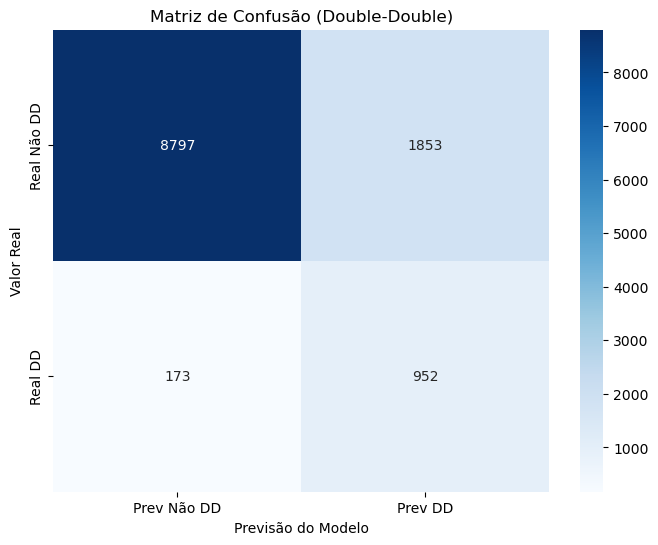

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cria uma instância do modelo
# max_iter aumentado para garantir convergência
modelo_logreg_c = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced') 
# class_weight='balanced' ajuda o modelo a dar mais importância para a classe minoritária

print("Iniciando o treinamento do modelo de Regressão Logística para Double-Double...")
# Treina o modelo
modelo_logreg_c.fit(X_train_c_processed, y_train_c)
print("Modelo treinado com sucesso!")

# Faz previsões
y_pred_c = modelo_logreg_c.predict(X_test_c_processed)
print("\nPrevisões realizadas.")

# Avalia o desempenho
accuracy_c = accuracy_score(y_test_c, y_pred_c)
print(f"\nAcurácia (Double-Double): {accuracy_c * 100:.2f}%")

print("\nRelatório de Classificação (Double-Double):")
print(classification_report(y_test_c, y_pred_c, target_names=['Não DD', 'DD'])) # Adiciona nomes às classes

# Plota a Matriz de Confusão
cm_c = confusion_matrix(y_test_c, y_pred_c)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_c, annot=True, fmt='d', cmap='Blues', xticklabels=['Prev Não DD', 'Prev DD'], yticklabels=['Real Não DD', 'Real DD'])
plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão (Double-Double)')
plt.show()

## Ánálise dos Resultados da Classificação (Regressão Logística - Double-Double)

Avaliando o modelo de `LogisticRegression` (com `class_weight='balanced'`) para a tarefa de prever a ocorrência de um Double-Double (DD):

* **Acurácia Geral:** 82.79%. Embora pareça alta, acaba sendo enganoso devido ao desbalanceamento das classes (apenas ~9.5% de DDs no dataset).
* **Classe Minoritária (DD):**
    * **Precision (0.34):** Muito baixa. Indica que a maioria das previsões de DD feitas pelo modelo está incorreta (alta taxa de Falsos Positivos).
    * **Recall (0.85):** Muito alto. O modelo consegue identificar 85% de todos os DDs que realmente ocorreram.
    * **F1-Score (0.48):** Baixo, refletindo o fraco equilíbrio entre precisão e recall para esta classe.
* **Classe Majoritária (Não DD):** Bom desempenho, com alta precisão (0.98) e recall razoável (0.83).

O parâmetro `class_weight='balanced'` ajudou o modelo a não ignorar a classe minoritária (alto recall), mas o custo foi uma precisão muito baixa para as previsões de Double-Double. O modelo atual gera muitos "alarmes falsos".

A idea é experimentar um modelo mais complexo como o `RandomForestClassifier`, para verificar se ele consegue um melhor equilíbrio entre precisão e recall na previsão de Double-Doubles. Se necessário, aplicar técnicas de reamostragem como o SMOTE no conjunto de treinamento.

## Treinando Um modelo mais complexo de classificação 

Random Forest classifier

Iniciando o treinamento do RandomForestClassifier para Double-Double...
Modelo treinado com sucesso!

Previsões realizadas.

Acurácia (Double-Double - RF): 89.94%

Relatório de Classificação (Double-Double - RF):
              precision    recall  f1-score   support

      Não DD       0.96      0.93      0.94     10650
          DD       0.48      0.65      0.55      1125

    accuracy                           0.90     11775
   macro avg       0.72      0.79      0.75     11775
weighted avg       0.92      0.90      0.91     11775



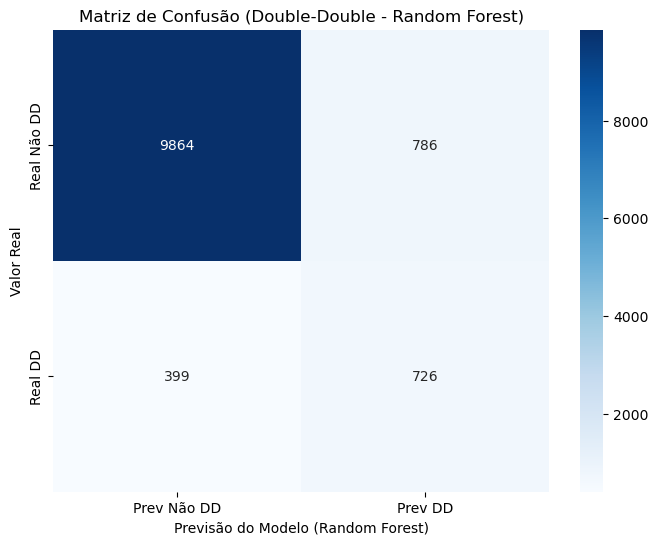

In [14]:
# Modelos Mais Complexos (Classificação) e Avaliação
from sklearn.ensemble import RandomForestClassifier
# (As métricas, matplotlib, seaborn já foram importados)

modelo_rf_c = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced',
    max_depth=15,
    min_samples_leaf=5
)

print("Iniciando o treinamento do RandomForestClassifier para Double-Double...")
# Treina o modelo
modelo_rf_c.fit(X_train_c_processed, y_train_c)
print("Modelo treinado com sucesso!")

# Faz previsões
y_pred_rf_c = modelo_rf_c.predict(X_test_c_processed)
print("\nPrevisões realizadas.")

# Avalia o desempenho
accuracy_rf_c = accuracy_score(y_test_c, y_pred_rf_c)
print(f"\nAcurácia (Double-Double - RF): {accuracy_rf_c * 100:.2f}%")

print("\nRelatório de Classificação (Double-Double - RF):")
# target_names=['Não DD', 'DD'] para nomear as classes 0 e 1
print(classification_report(y_test_c, y_pred_rf_c, target_names=['Não DD', 'DD']))

# Plota a Matriz de Confusão
cm_rf_c = confusion_matrix(y_test_c, y_pred_rf_c)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_c, annot=True, fmt='d', cmap='Blues', xticklabels=['Prev Não DD', 'Prev DD'], yticklabels=['Real Não DD', 'Real DD'])
plt.xlabel('Previsão do Modelo (Random Forest)')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão (Double-Double - Random Forest)')
plt.show()

### Análise dos Resultados da Classificação (Random Forest - Double-Double)

O modelo `RandomForestClassifier` (com `class_weight='balanced'`, 100 árvores, `max_depth=15`, `min_samples_leaf=5`) para a previsão de Double-Double:

* **Acurácia Geral:** 89.94%
* **Relatório de Classificação:**
    * **Não DD:** Precision: 0.96 | Recall: 0.93 | F1-Score: 0.94
    * **DD:** Precision: 0.48 | Recall: 0.65 | F1-Score: 0.55

**Comparação com a Regressão Logística:**
O RandomForestClassifier apresentou uma melhoria na precisão da classe minoritária (DD), subindo de 0.34 para 0.48. Isso mostra uma redução considerável nos Falsos Positivos. Essa melhora veio com uma redução no recall (de 0.85 para 0.65), significando que o modelo agora detecta uma proporção menor dos Double-Doubles reais. No entanto, o F1-Score para a classe DD aumentou de 0.48 para 0.55, sugerindo um melhor equilíbrio geral entre precisão e recall. A acurácia geral também foi superior.

**Conclusão da Classificação:** O `RandomForestClassifier` ofereceu um trade-off mais vantajoso para este problema. Embora capture menos Double-Doubles (recall menor), suas previsões positivas são consideravelmente mais confiáveis (precisão maior). O F1-Score superior indica que ele é o modelo preferível para a tarefa de classificação neste projeto.